In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_smet(path, var):

    """ Reads a .smet file and returns a time series of the defined variable as a pandas data frame.
    Args:
        path (str): String pointing to the location of the .smet file to be read.
        var  (str): Variable you want to plot
    Returns:
        Time series of defined variable as a pandas data frame.
    """

    # Load .smet file as a Pandas data frame
    df = pd.read_csv(path)

    # Determine indices for data retrieval
    bump = 2

    fields_row = np.where(df[df.columns[0]].str.startswith("fields"))[0][0] + bump

    data_row = np.where(df[df.columns[0]] == '[DATA]')[0][0] + bump

    fields =  np.loadtxt(path, skiprows=fields_row - 1, max_rows=1, dtype='str')

    data_col = np.where(fields == var)[0][0] - bump

    # Creates pandas data frame
    time = np.loadtxt(path, skiprows=data_row, usecols=0, dtype = 'str')

    time = pd.to_datetime(time, format='%Y-%m-%dT%H:%M:%S')

    data = np.loadtxt(path, skiprows=data_row, usecols=data_col)

    ts = pd.DataFrame(data, index=time)

    # Set no data values to nan
    ts[ts == -999] = np.nan

    # Return time series as Pandas data frame
    return ts

In [3]:
out_path = "/scratch/summit/erke2265/mass-balance/10_sites/output/-82.000_60.625_SPINUP.smet"
in_path = "/scratch/summit/erke2265/mass-balance/10_sites/smet/-82.000_60.625.smet"

In [8]:
HS_mod = read_smet(out_path, "HS_mod")
swe = read_smet(out_path, "SWE")
sub = read_smet(out_path, "MS_Sublimation")
psum = read_smet(in_path, "PSUM")

In [10]:
MS_snow = read_smet(out_path, "MS_Snow")
MS_wind = read_smet(out_path, "MS_Wind")
precip = MS_snow - MS_wind

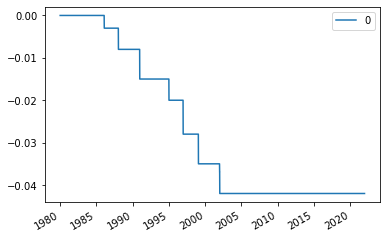

In [13]:
MS_melt = read_smet(out_path, "MS_Evap")
MS_melt.cumsum().plot()

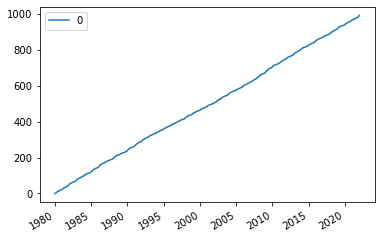

In [11]:
precip.cumsum().plot()

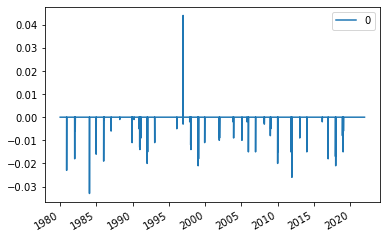

In [7]:
sub.plot()

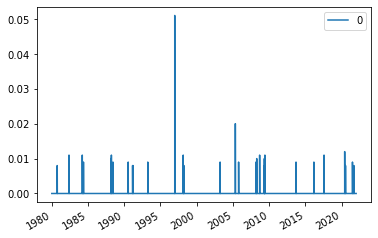

In [9]:
swe.plot()

<Figure size 432x288 with 0 Axes>

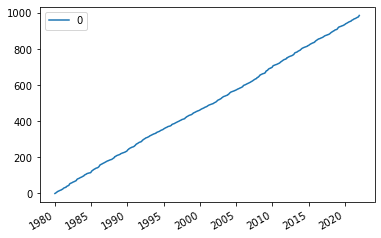

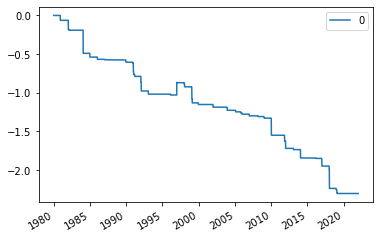

In [6]:
plt.figure()
psum.cumsum().plot()
sub.cumsum().plot()